## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

### Distribuições - Demo 1

* Intuições sobre distribuições (pré Gaussian Mixture Models)

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson, uniform, binom, expon

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
random_seed = 33
np.random.seed(random_seed)

### Histograma

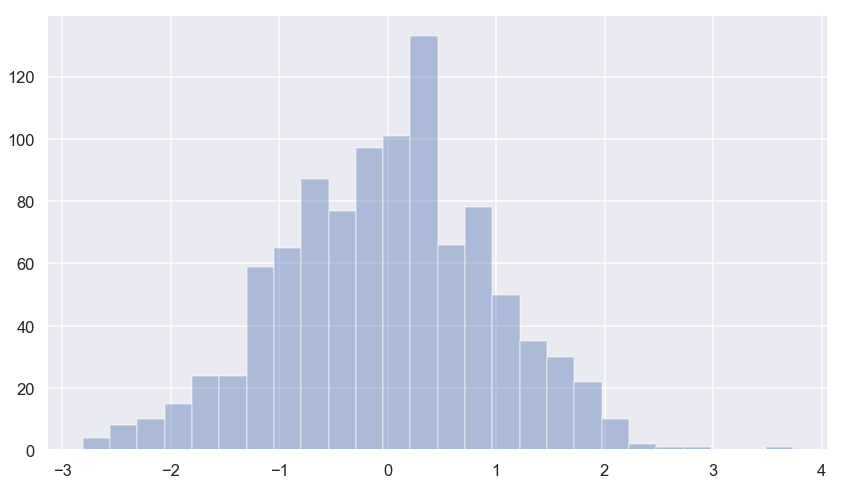

In [4]:
data = norm.rvs(size=1000,loc=0, scale=1, random_state=random_seed)

ax = sns.distplot(data, kde=False)

### Histograma "com curva'

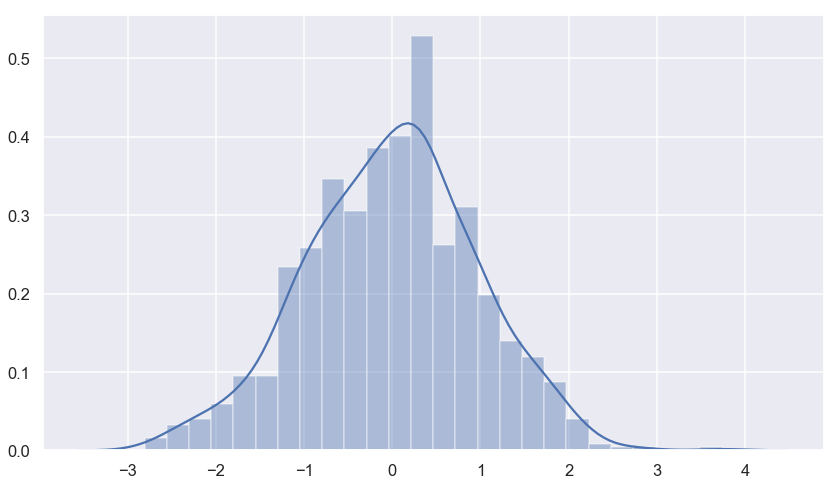

In [5]:
ax = sns.distplot(data, kde=True)

## Diferenças de distribuições com diferentes médias e desvios padrão

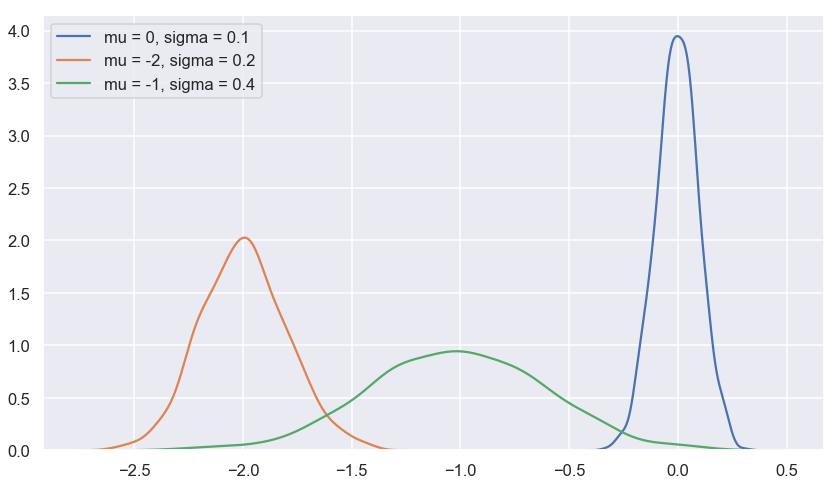

In [6]:
mu = 0
sigma = 0.1 
size = 1000
np.random.seed(200)

data = np.random.normal(mu, sigma, size)
ax = sns.distplot(data, kde=True, hist=False, label='mu = 0, sigma = 0.1')

mu = -2
sigma = 0.2
size = 1000
data = np.random.normal(mu, sigma, size)
ax = sns.distplot(data, kde=True, hist=False, label='mu = -2, sigma = 0.2')

mu = -1
sigma = 0.4
size = 1000
data = np.random.normal(mu, sigma, size)
ax = sns.distplot(data, kde=True, hist=False, label='mu = -1, sigma = 0.4')

ax.legend()

## Diferentes tipos de distribuição

Existem diversos tipos de distribuição e cada tipo tem suas diferentes aplicações. Algumas distribuições se aplicavam a variáveis discretas enquanto outras e aplicam a variáveis contínuas. Aqui vamos ver, graficamente, como cada tipo se comporta.

### Uniforme
Todos os valores do intervalo são igualmente prováveis.

#### Exemplos
* Ao jogarmos um dado, a chance de obtermos 1,2,3,4,5 ou 6 é igualmente provável. 
* Ao pegarmos a carta de um baralho (sem cartas repetidas), é igualmente provável que a carta seja um Rei de Espada, uma Rainha de Copas, ou qualquer outra carta.

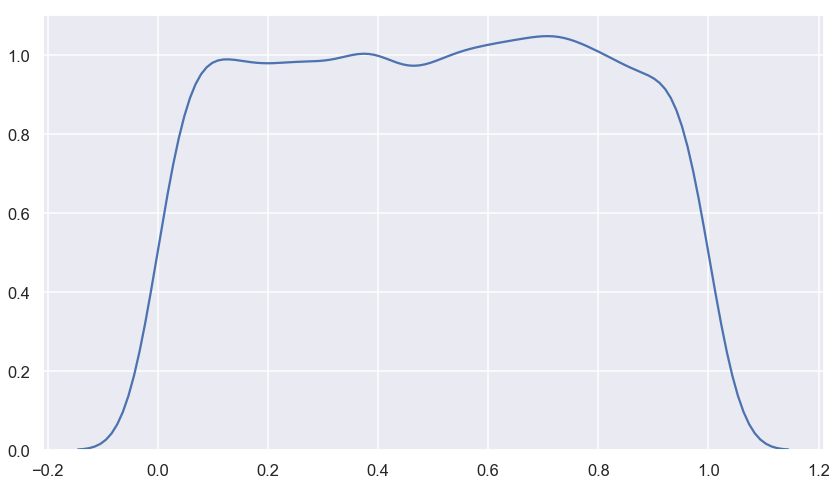

In [7]:
data = uniform.rvs(size=10000, loc=0, random_state=random_seed)
ax = sns.distplot(data, kde=True, hist=False)

### Poisson

Distribuição de probabilidades relacionada ao número de vezes que um determinado evento ocorreu em um determinado intervalo de tempo (ou espaço).

\begin{align}
\mathbb{P}(X=x)=e^{-\lambda}\frac{\lambda^{x}}{x!}
\end{align}

$e$ = Número de Euler

$\lambda$ = Média de número de eventos no determinado intervalo.

#### Exemplos
* Qual a probabilidade de um vendedor vender 3 apartamentos em 1 semana, sendo que a média é de 10 apartamentos por mês?
* Qual a probabilidade de 4 bebês nascerem em um hora em um hospital, sendo que a média de nascimentos é 1.8 bebês por hora?

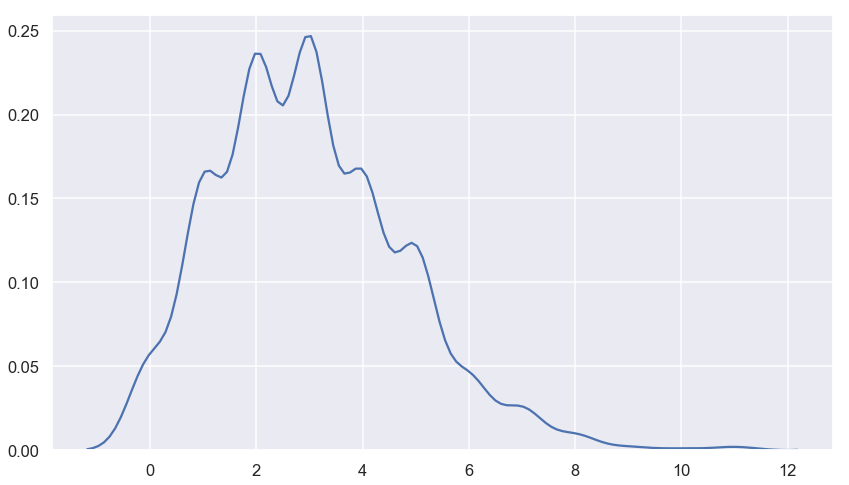

In [8]:
data = poisson.rvs(size=1000, mu=3, random_state=random_seed)
ax = sns.distplot(data, kde=True, hist=False)

### Binomial

Distribuição de probabilidades que descreve o número de sucessos em uma sequência de $N$ experimentos independentes, onde cada experimento é binário (e.g. sim ou não, cara ou coroa).

\begin{align}
\mathbb{P}(X=x)=\left(\begin{array}{c}n\\x\end{array}\right) p^x(1-p)^{n-x}
\end{align}

\begin{align}
\left(\begin{array}{c}n\\x\end{array}\right)=\frac{n!}{x!(n-x)!}
\end{align}

#### Exemplos
* Imagine que jogamos um dado 10 vezes. Qual a probabilidade de obtermos 5 vezes o número 6?
* Imagine que temos uma moeda "com defeito", onde obtemos coroa com probabilidade 0.3. Qual a probabilidade de obtermos cara depois de jogadas? 

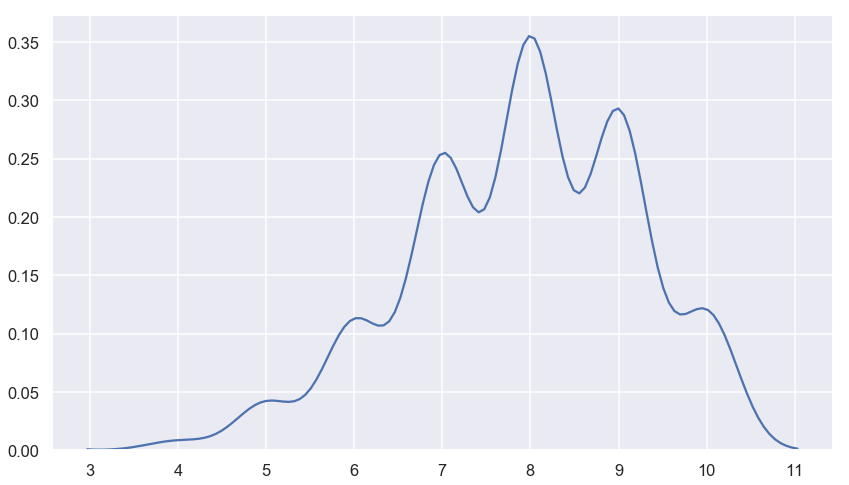

In [9]:
data = binom.rvs(n=10, p=0.8, size=1000, random_state=random_seed)
ax = sns.distplot(data, kde=True, hist=False)

### Exponencial
Utilizada para descrever o intervalo ou espaço em que algo ocorre. Possui uma ligação direta com a distribuição de Poisson:
* Poisson: estimativa da quantidade de eventos num intervalo
* Exponencial: analisa o contrário - um intervalo ou espaço para ocorrência de um evento

#### Exemplos
* O tempo médio de atendimento em um caixa de banco é 7 minutos. Qual a probabilidade de um cliente esperar mais que 10 minutos para ser atendido, sendo que o tempo médio é descrito por uma distribuição exponencial?
* Em média, um aluno complete 6 exercícios de matemática em 1 hora. Qual a probabilidade do aluno terminar um exercício entre 5 e 10 minutos?

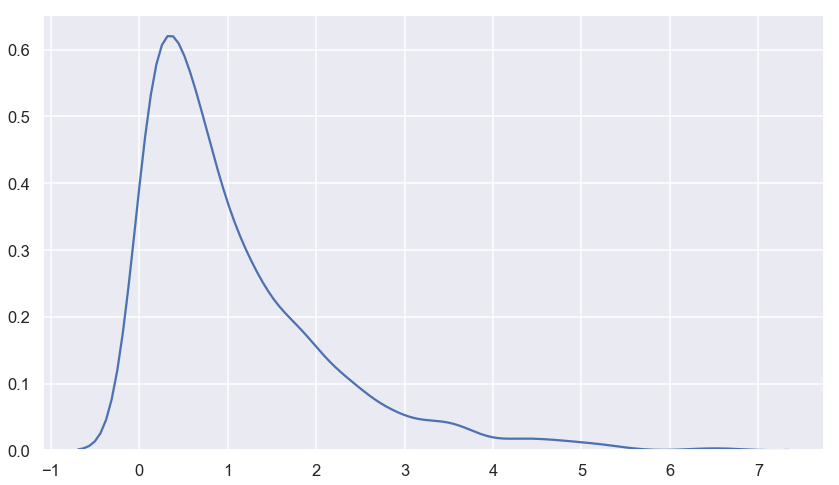

In [10]:
data = expon.rvs(scale=1, loc=0, size=1000, random_state=random_seed)
ax = sns.distplot(data, kde=True, hist=False)

## Teorema do Limite Central

In [11]:
sns.set(style='darkgrid', rc={'figure.figsize': (14, 18)})

In [12]:
def plot_distributions_comparison(distribution='uniform', num_samples=1000):

    plot_idx = 0
    max_iter = 101
    
    f, axes = plt.subplots(6, 2)
    plt.subplots_adjust(bottom=0.0, top=1.2)

    f.suptitle('Distribuição: ' + distribution, y=1.25)
    
    for i in range(0, max_iter, 20):
        if i == 0:
            num_iter = 2
        else:
            num_iter = i

        data = []
        data_mean = []

        for j in range(num_iter):
            
            if distribution == 'uniform':
                value = uniform.rvs(size=num_samples,loc=-2)
            elif distribution == 'poisson':
                value = poisson.rvs(size=num_samples,loc=-2, mu=1)
            elif distribution == 'exponential':
                value = expon.rvs(scale=1, loc=-2, size=num_samples)
            elif distribution == 'binomial':
                value = binom.rvs(n=10, p=0.8, size=num_samples)         
            
            data_mean.append(np.mean(value))
            data.extend(value)

        title = 'número de amostragens: ' + str(num_iter)
        ax = sns.distplot(data, kde=True, hist=True, ax=axes[plot_idx][0])
        ax.set_title(title)

        ax = sns.distplot(data_mean, kde=True, hist=True, ax=axes[plot_idx][1])
        ax.set_title(title + ' - média')

        plot_idx += 1

### Uniforme

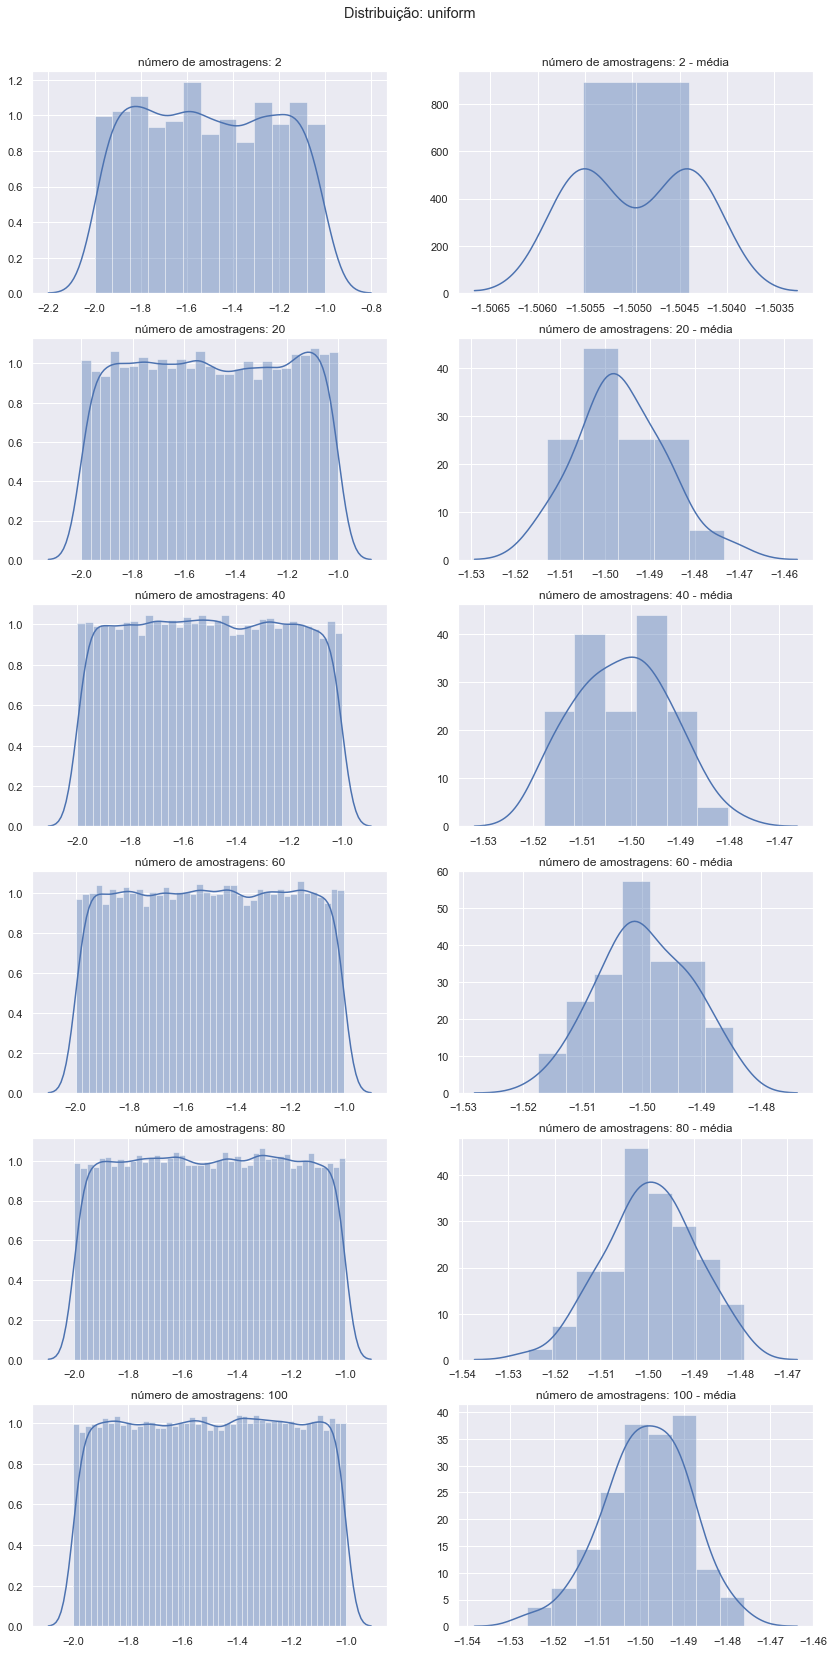

In [13]:
plot_distributions_comparison('uniform')

### Poisson

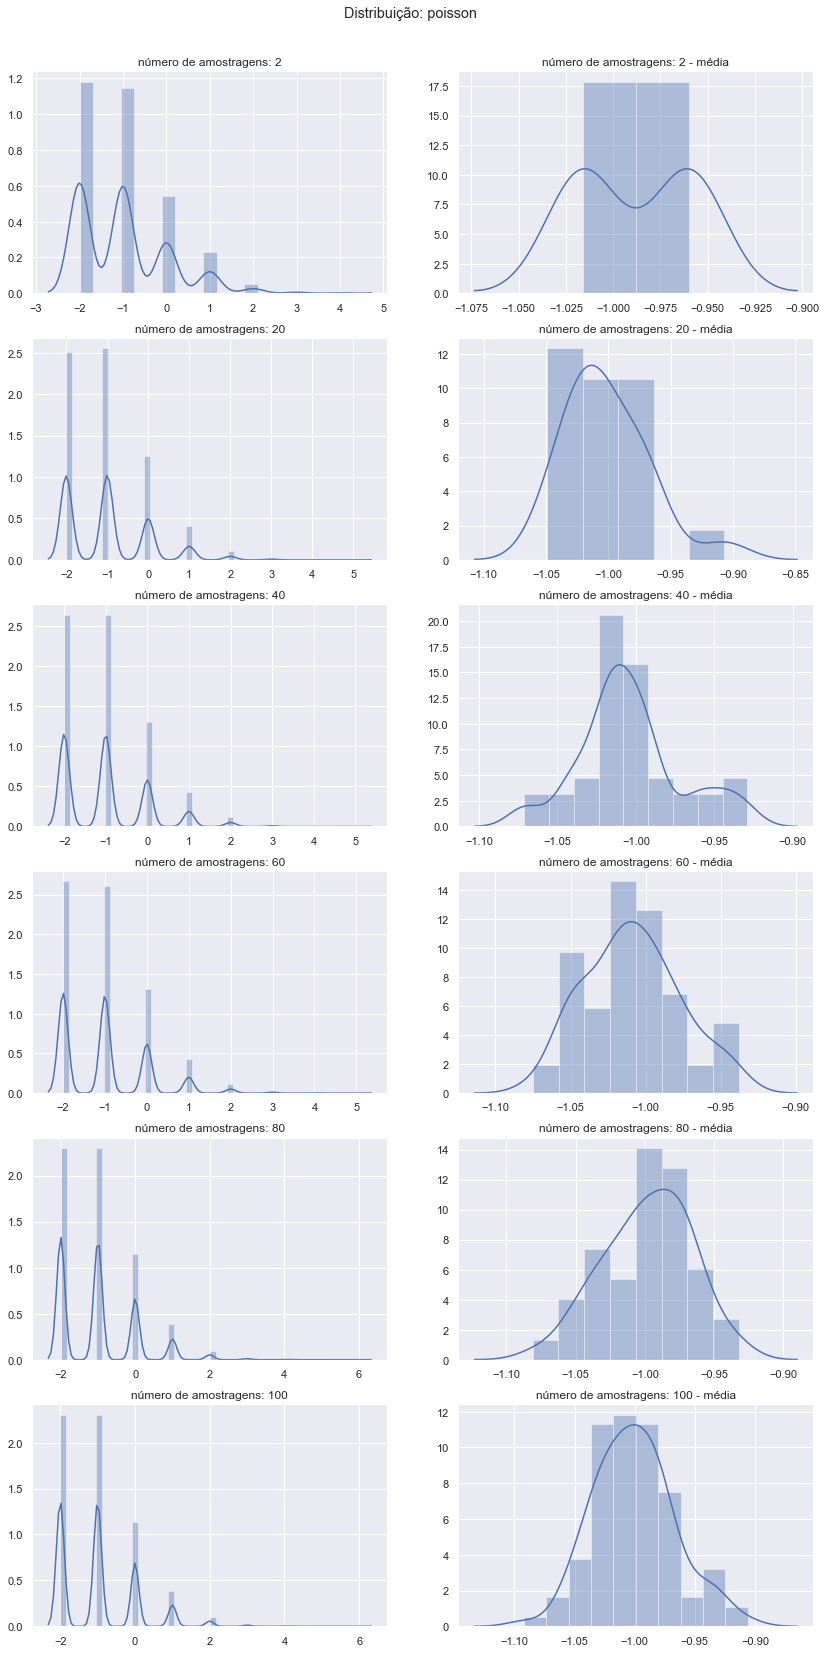

In [14]:
plot_distributions_comparison('poisson')

### Binomial

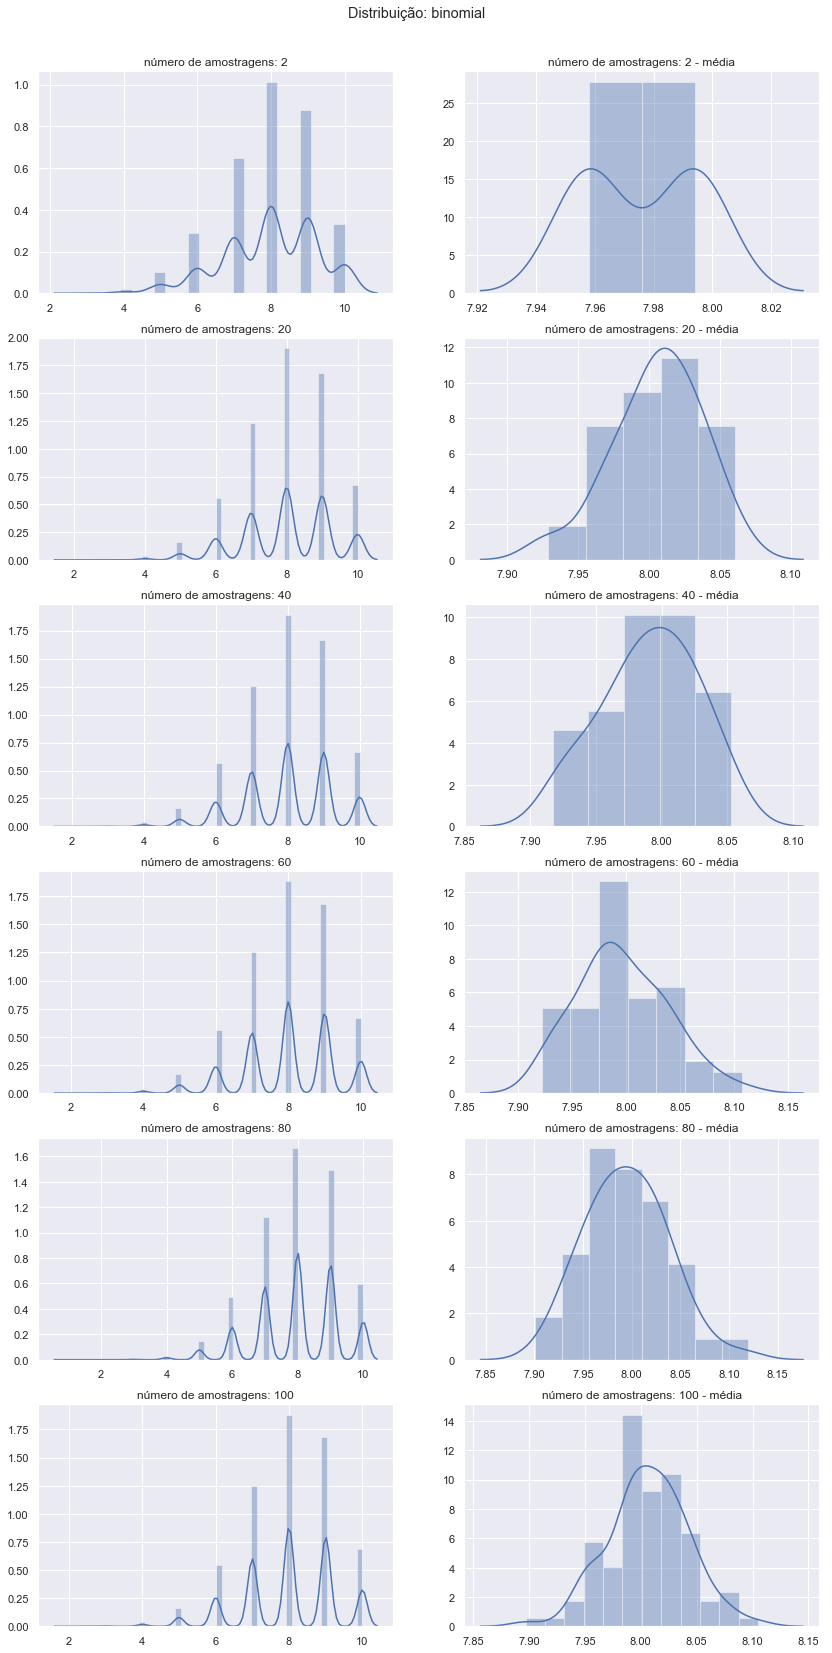

In [15]:
plot_distributions_comparison('binomial')

### Exponencial

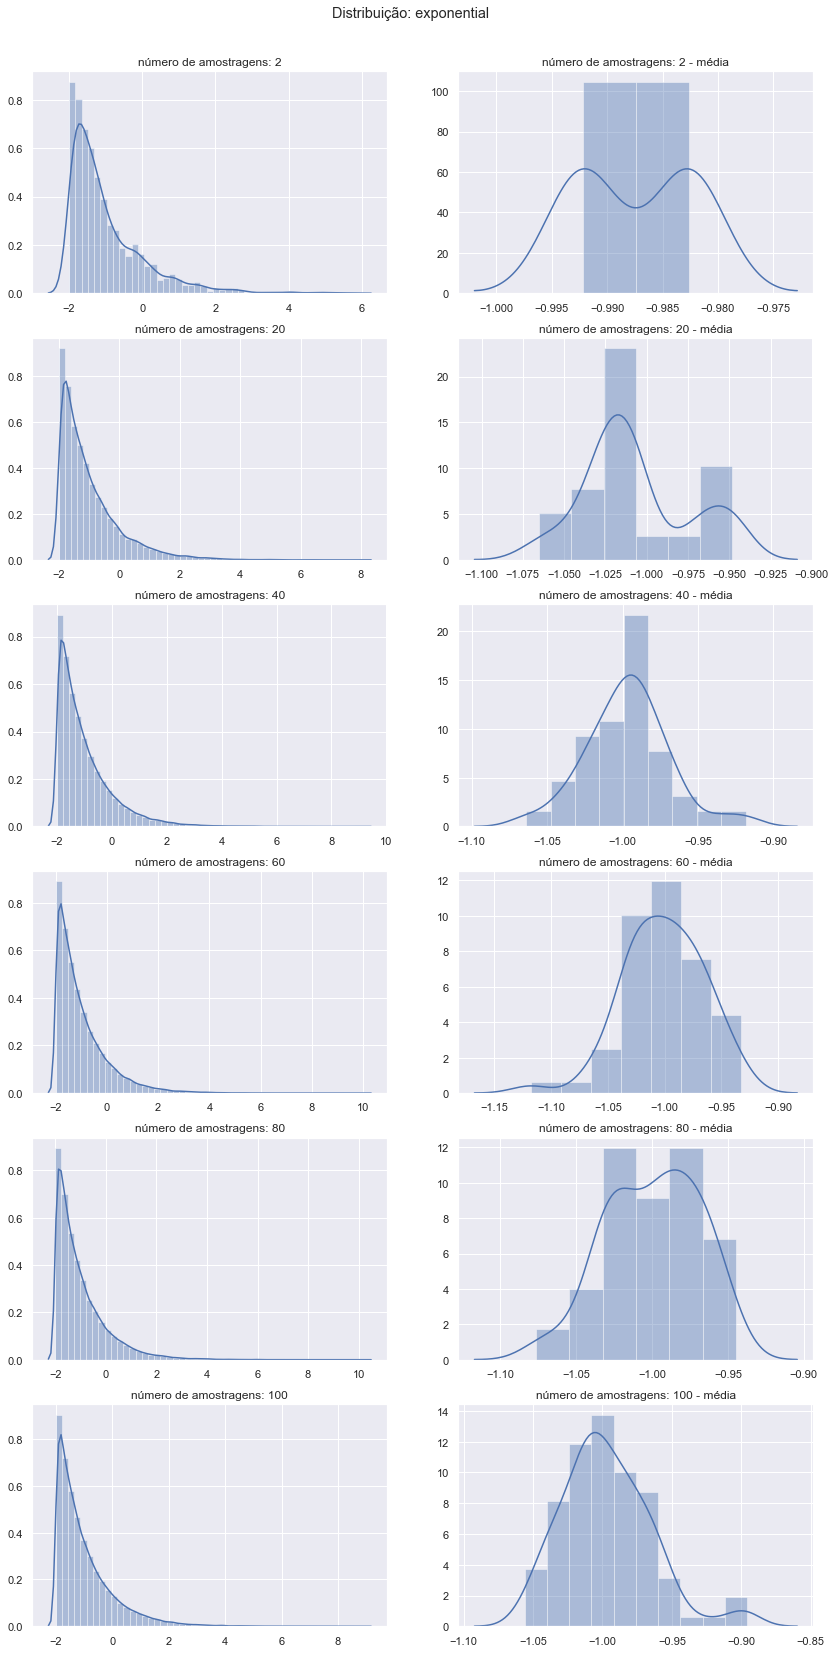

In [16]:
plot_distributions_comparison('exponential')